In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display

In [3]:
df = pd.read_csv(r'../data/bull.csv')
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14020\2778762013.py:1: DtypeWarning: Columns (5,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'../data/bull.csv')


,link,type,date,address,area,infrastructure,floors_sum,homes_num,floor_num,rooms,...,desc,price,mortgage,rent,facilities,Dollar,address_no_digits,region,latitude,longitude
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,90.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,3.0,2,...,وکالتی,250000000.0,NaN,NaN,"آبگرمکن,بخاری,پارکینگ,تراس,اپن,کمد دیواری,هود,",13391,ارمغان,11.0,36.347262,59.466991
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,112.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",3.0,7.0,3.0,2,...,شش دانگ ملک,695000000.0,NaN,NaN,"شوفاژ,پکیج,انباری,پارکینگ,تراس,اپن,آیفون تصویر...",13391,هاشمیه,9.0,36.307539,59.501074
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,81.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",6.0,4.0,5.0,2,...,شش دانگ ملک,370000000.0,NaN,NaN,"انباری,پارکینگ,تراس,پنجره دوجداره,نگهبان,آسانس...",13391,حسابی جنوبی,10.0,36.349646,59.495644
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,81.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,8.0,3.0,2,...,شش دانگ ملک,450000000.0,NaN,NaN,"آبگرمکن,بخاری,انباری,پارکینگ,تراس,اپن,آیفون تص...",13391,کوثر شمالی,9.0,36.309638,59.510348
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,175.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,2.0,3,...,شش دانگ ملک,962500000.0,NaN,NaN,"شوفاژ,پکیج,اطفاء حریق,انباری,پارکینگ,تراس,پنجر...",13391,حسابی شمالی,10.0,36.362017,59.504458


In [3]:
df.loc[df['floors_sum'] < df['floor_num'], 'floors_sum'] = df['floor_num']
df.loc[df['rooms'] > 5, 'rooms'] = (df['rooms'] // 10).astype(int)
df.loc[df['age'] < 0, 'age'] = df['age'] * (-1)

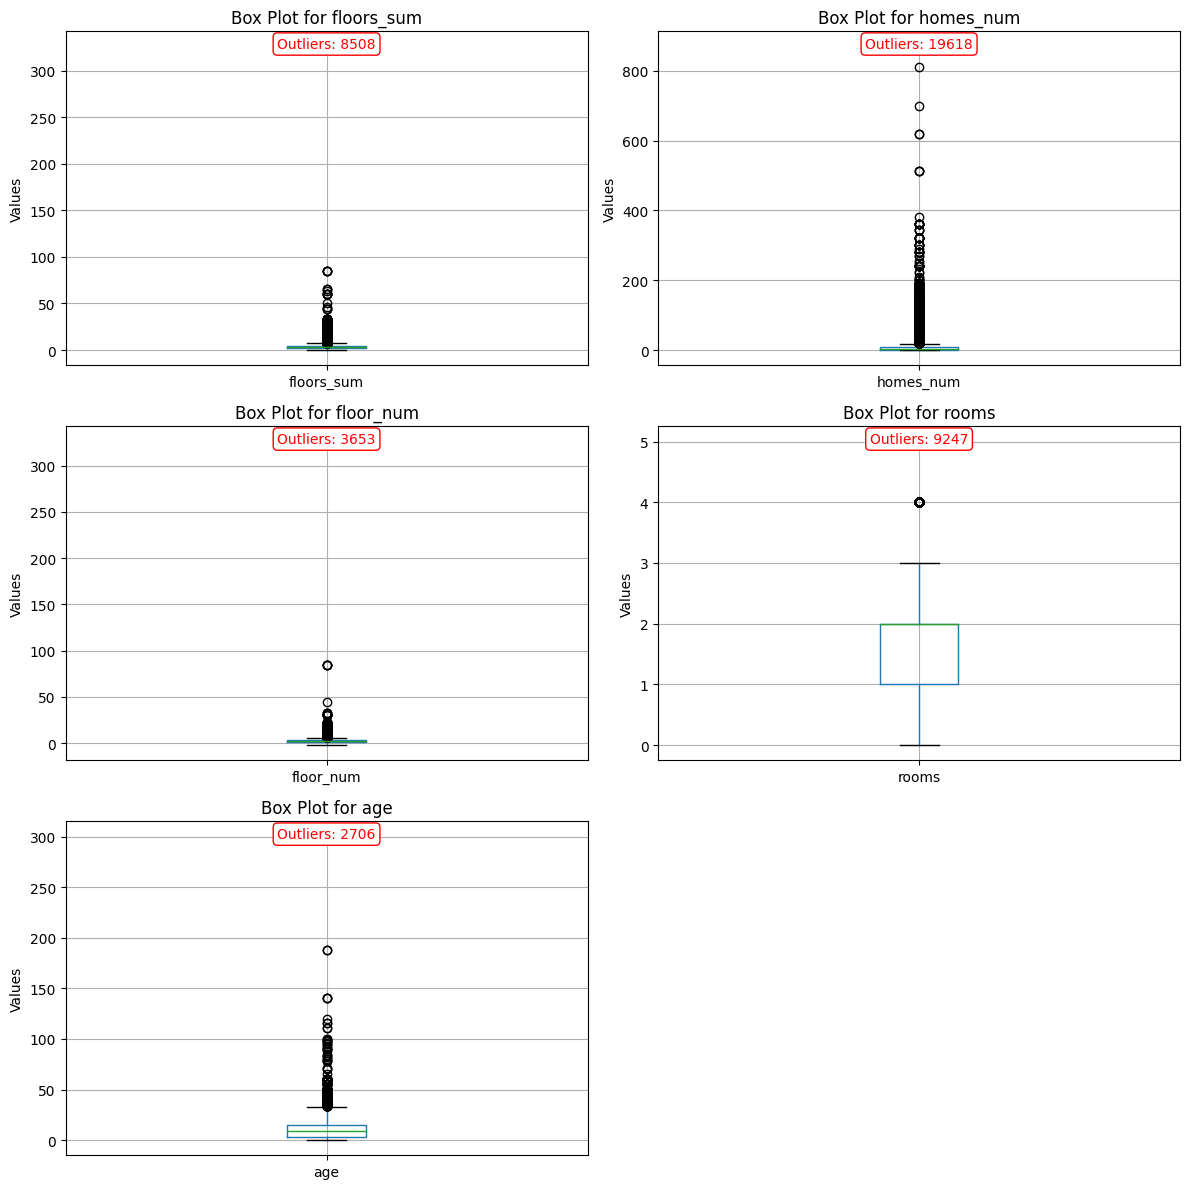

In [4]:
columns_to_plot = ['floors_sum', 'homes_num', 'floor_num', 'rooms', 'age']

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 2)  # Calculate row and column index for 3x2 grid

    # Calculate IQR and outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Plot boxplot
    df[[column]].boxplot(ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot for {column}')
    axes[row, col].set_ylabel('Values')

    # Add outlier count as text annotation
    outlier_count = len(outliers)
    axes[row, col].annotate(
        f'Outliers: {outlier_count}', 
        xy=(0.5, 0.95), 
        xycoords='axes fraction', 
        ha='center', 
        fontsize=10, 
        color='red', 
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white')
    )

# Remove the unused subplot (bottom right in the 3x2 grid if necessary)
if len(columns_to_plot) < 6:
    fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


In [10]:
df['rooms'].value_counts()

rooms
2    208673
3     69077
1     64707
0     41994
4      7709
5      1538
Name: count, dtype: int64

In [12]:
df.to_csv('../data/bull.csv',encoding='utf-8-sig',index=False)

In [16]:
df['region'].value_counts()

region
9         84760
2         79719
10        61974
12        46141
11        41355
1         27898
8         19897
3          8107
7          7831
5          7704
6          3502
نامشخص     2198
13         2025
4           559
Name: count, dtype: int64

In [5]:
regions = {
    1: [
        "احمد آباد", "راهنمایی", "فلسطین", "آبکوه", "ارشاد", "سجاد", "کفایی","پرستار","تورج","ملاصدرا","ابومسلم","بزرگمهر جنوبی","عارفی","هجرت","بعثت"
        "گوهرشاد", "کلاهدوز", "کوی دکتری", "صاحب الزمان", "سعد آباد", "شهید دستغیب","سناباد","احمدآباد","خیام","قرنی","قاضی طباطبایی","صادقی","سنایی","فرهاد","بیستون","ابوذرغفاری","ابوذر غفاری",
        "دانشگاه","بخارایی","عارف","پاستور","بنفشه","ناصرخسرو","بابک","ابن سینا","محتشمی","اسفندیانی","بهشت","ناصر خسرو","عدالت","توفیق","دانشسرا","سجاد - بهارستان","حامدجنوبی",
        "گوهرشاد","نیلوفر","منوچهری","اقاقیا","گلستان","منفرد","کاظمیه","پامچال","مسعود غربی","نبش مجد","ابونصر","گلایل","مجدشمالی","مجد شمالی",
        "حاشیه عطار","حاشیه ابوسعید","حامد  مرجان","آپادانا","تکتم","بلوار سازمان اب","مولوی","نوربخش","زنبق","مالک اشتر","تکتم  ایرج","اسرار"
    ],
    2: [
        "سپاد", "خین عرب", "کوشک مهدی", "عبادی", "مطهری", "ابوطالب", "کیان سنتر","ششصد دستگاه",
        "کوی امیرالمؤمنین", "فدک", "بهاران", "جانباز", "فرامرز عباسی", "هنرور","عجمی","حائری",
        "نوده", "کارخانه قند", "ابوطالب", "عبدالمطلب", "هدایت", "ایثارگران","توکلی","لعل","شیشه چی","طرحچی",
        "شفا", "سمزقند", "شهید هنرور", "شهید مطهری", "حسین باشی", "آیت الله عبادی","وصال","صبوری","هدابت","پژن","فاروجی"
        "کاشانی", "زرکش", "مشهدقلی", "نوده", "حجت", "خین عرب", "قدس", "نوید", "اسماعیل آباد","مطهری شمالی","شهید مطهری شمالی","فرامرز","موسوی قوچانی","نسترن"
        "مجد","خیام شمالی","کریمی","شهید کریمی","حرعاملی","حر عاملی","مطهری جنوبی","ساجدی","چراغچی","مهدی","ثمانه","عامل","کامیاب","ذوالفقار","امیر","توس","پردیس","خیبر",
        "فخر","یاس","تلاش","مجتمع تجاری پروما","توحید","علیزاده","نسترن","نکاح","جوادالائمه","ظفر","سپهر","خادم الشریعه","تعاون","رو به روی فتح"
    ],
    3: [
        "چهارراه شهدا", "خیابان شهید کامیاب", "رسالت جنوبی", "بزرگراه شهید میرزایی", "الماس شرق"
        "میدان امام حسین", "چهارراه گاز", "محله سیس آباد", "خواجه ربیع", "محله بلال", "امید","مجد","پژمان",
        "شهرک مهرگان", "خیر آباد", "فاطمیه", "گاز", "مسلم", "رسالت", "راه آهن", "مسلم جنوبی","فرامرز - رسالت","شیخ صدوق",
        "بهمن", "مهر مادر", "مهر مادر شمالی", "قرقی", "عباس آباد", "دروی", "طبرسی شمالی","حرم مطهر","شهرستانی","مسلم شمالی","مسلم","هاشمی‌نژاد","هاشمی نژاد"
    ],
    4: [
        "پنجتن", "کشف رود", "شهید مفتح", "امت", "شهید آوینی", "بزرگراه شهید بابانظر", 
        "شهید گمنام", "وحدت", "مجلسی شرقی", "طبرسی جنوبی", "تقاطع غیرهمسطح فجر", 
        "ایثار", "فجر", "وحید", "تلگرد", "کوی مهدی", "گلشور", "طلاب", "التیمور", 
        "رده", "شهید قربانی" ,"نبوت","نواب صفوی","ویرانی","میثم تمار"
    ],
    5: [
        "مهدی آباد", "ثامن", "امیرالمؤمنین", "شهید آوینی", "نیزه", "مهرآباد","گلریز","نوغان","رئوف","پنجراه",
        "جلالیه", "رضاییه", "سجادیه", "کوی سلمان", "حسین آباد","کوی امیرالمومنین","امیرالمومنین","حریری","آفتابی","سخاوت"
    ],
    6: [
        "شهرک شیرین", "آقا مصطفی خمینی", "امیرآباد", "شهید معقول", "کشاورز", 
        "شهید رجایی", "پورسینا", "کنه بیست", "اروند", "انصار", "شهید باهنر", 
        "شهید بسکآبادی", "چهنو", "مصلی", "کارمندان دوم", "کارمندان اول", "شهید رستمی", 
        "شیرودی", "کوی 22 بهمن","چمن","صفدری نژاد","مزدوری"
    ],
    7: [
        "کوی پلیس", "کوشش", "مقدم", "17 شهریور", "کارگران", "پروین اعتصامی","سحر","صبا",
        "طرق 2", "زارعین", "ابوذر", "انقلاب", "بهارستان", "خلج", "قائم", "فرودگاه","فرودگاه","سبحان",
        "المهدی", "سیدی", "عسگریه", "عنصری","شهریور","هفده شهریور","فلکه ضد ( خرداد)","خرداد","فدائیان اسلام"
    ],
    8: [
        "سرشور", "جنت", "آبشار", "بهشتی", "امام خمینی", "امام رضا","کوه سنگی","کوهسنگی","جهان آرا","شهرک طالقانی","نامجو","سعدی","پارس","میدان عدل خمینی","حکیم نظامی",
        "همت","فلکه برق (میدان بسیج)","دی","زیست خاور","بهار","جهان ارا","آبادگران","چهارراه مخابرات","دانش","سلامی","برج مهر کوهسنگی","مجتمع زیست خاور","کوهسنگی - رودکی",
        "امیرکبیر","خمینی","خرمشهر","ملک الشعرا","رزم","گلستان غربی","اندرزگو","فیاض بخش","سرای بلور","بازار مرکزی"
    ],
    9: [
        "طالقانی", "زکریا", "سرافرازان", "چهارچشمه", "کوثر", "رضاشهر","دقیقی","شاملو","مولانا","منتظری","خاکپور",
        "نوفل", "نیروهوایی", "شقایق 1", "شقایق 2", "گلدیس", "ولیعصر", "انتهای دلاوران","دعبل خزائی","خضرائی منش","ریاضی",
        "لادن", "اقبال", "آب و برق", "هنرستان", "هاشمیه","لاله","فکوری","صیاد","صیاد شیرازی","هفت تیر","پیروزی","فکوری","محله سرافرازان",
        "نماز","صدف","صارمی","خاقانی","ارغوان","زیتون","پایداری","کوثرشمالی","کوثر شمالی","محله هنرستان","هنرستان","محله کوثر","صابر","نخل","رهایی","رودکی"
        ,"محله چهارچشمه","کوثرجنوبی","کوثر جنوبی","ویلا","حافظیه","دهخدا","برونسی","نیاوران","دلاوران","حافظ","نارنج","غزال","سرافراز","فرخی","سامانیه","صیادشیرازی",
        "حق شناس","برکپور","سرو","کاوه","گلشن","انوری","میرکی","نوکاریزی","کلانتری","برسلانی","طیاری","لادن","کسائی","نوفل لوشاتو","نوفل","خورشید","تابان"
    ],
   10: [
        "رازی", "شریعتی", "شاهد", "فرهنگیان", "رسالت", "لشگر", "امامیه", "ادیب شمالی","راستی","امام دوست","راستان","میدان مادر","میدان حجاب","حجاب","پیامبراعظم","نرگس"
        "حجاب", "ایثارگران", "استاد یوسفی", "امام هادی", "خاتم الانبیا","قاسم‌آباد (شهرک غرب)" , "قاسم آباد","اندیشه","فلاحی","یوسفیه","رفیعی","مشکینی","حسابی","حسابی شمالی","ادیب"
        "شهرآرا", "رستگاری","بهورز","حسابی جنوبی","ادیب جنوبی","میعاد","آزادی","نهضت","شهرآرا","رادان","ابرار","استادیوسفی","استاد یوسفی","مروارید","هاشمی مهنه","چهارراه رستگاری","رستگاری",
        "نیکی"
    ],
    11: [
        "آزادشهر", "سیدرضی", "دانش آموز", "دانشجو", "شریف", "فارغ التحصیلان", "مهران","پژوهش","شیخ مفید","بیهقی",
        "تربیت", "شهید رضوی", "زیباشهر", "فرهنگ","امامت","جلال","جلال آل احمد","معلم","آزاده","آموزگار","ستاری","قانع","ارمغان","آرمان","سروش","دندانپزشکان","معاد",
        "استقلال","دندان پزشکان","شهیدقانع","شهید قانع","مدرس","دانش اموز","دادگر","سیدمرتضی","سید مرتضی","مهران","تعلیم"
    ],
    12: [
        "وکیل آباد", "امیریه", "الهیه", "مجیدیه", "جاهدشهر", "نمایشگاه", "رفسنجانی","مهدیه","علویه","منجم","خوش منظر","چناری","محترم"
        "صفی آباد", "رحمانیه", "نقویه", "صادقیه", "کلاته برفی", "چهاربرج", "فردوسی","اقدسیه","محمدیه","عصمتیه","میثاق","محله جاهدشهر","جاهدشهر","بوستان","تقویه"
    ],
    13:[
        "گلبهار - جمهوری","گلبهار","گلبهار جمهوری","گلبهار - فروردین","گلبهار فروردین","روبروی موج های خروشان","طرقبه","شاندیز"
    ]
}


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from rapidfuzz import process, fuzz  # Import سریع برای rapidfuzz
import pandas as pd
import numpy as np

# Preprocess regions
regions_flat = [(region, neighborhood) for region, neighborhoods in regions.items() for neighborhood in neighborhoods]
region_df = pd.DataFrame(regions_flat, columns=["region", "neighborhood"])

# Preprocess text normalization function
def normalize_text(text):
    text = text.strip().lower()
    text = text.replace("ي", "ی").replace("ك", "ک")
    return text

region_df["neighborhood"] = region_df["neighborhood"].apply(normalize_text)

# Vectorize with CountVectorizer
vectorizer = CountVectorizer().fit(region_df["neighborhood"])
region_vectors = vectorizer.transform(region_df["neighborhood"])

# Function to find region
def find_region(address):
    if pd.isna(address):
        return np.nan
    address = normalize_text(address)

    # 1. Exact match check
    for region, neighborhoods in regions.items():
        if address in map(normalize_text, neighborhoods):
            return region

    # 2. Cosine similarity fallback
    address_vector = vectorizer.transform([address])
    similarities = cosine_similarity(address_vector, region_vectors)
    max_index = np.argmax(similarities)
    max_similarity = similarities[0, max_index]

    # Dynamic threshold for cosine similarity
    threshold = np.mean(similarities) + 0.5 * np.std(similarities)
    if max_similarity > threshold:
        return region_df.iloc[max_index]["region"]

    # 3. Fuzzy matching fallback
    matches = process.extract(address, region_df["neighborhood"].tolist(), scorer=fuzz.partial_ratio, limit=1)
    if matches and matches[0][1] > 80:  # Threshold for fuzzy match (e.g., 80)
        matched_neighborhood = matches[0][0]
        return region_df.loc[region_df["neighborhood"] == matched_neighborhood, "region"].values[0]

    # 4. Default to unknown
    return "نامشخص"

# Apply the function
df["region"] = df["address_no_digits"].apply(find_region)


In [7]:
df.loc[df['region']== 'نامشخص', 'region'] = 9

In [8]:
df.loc[df['age']>29,'age'] = (df.groupby(df['region'])['age'].mean()).astype(int)

In [9]:
df.groupby(df['region'])['age'].mean()

region
1     11.463237
2      8.669190
3      9.091461
4      9.556604
5      6.556624
6      9.194299
7      9.131701
8      9.070341
9      9.510675
10    10.018473
11     9.896407
12     5.631595
13     4.097443
Name: age, dtype: float64

In [10]:
df.loc[df['floors_sum']>10,'floors_sum'] = (df.groupby(df['region'])['floors_sum'].mean()).astype(int)
df.loc[df['homes_num']>20,'homes_num'] = (df.groupby(df['region'])['homes_num'].mean()).astype(int)
df.loc[df['floor_num']>10,'floor_num'] = (df.groupby(df['region'])['floor_num'].mean()).astype(int)
df.loc[df['floors_sum'] < df['floor_num'], 'floors_sum'] = df['floor_num']

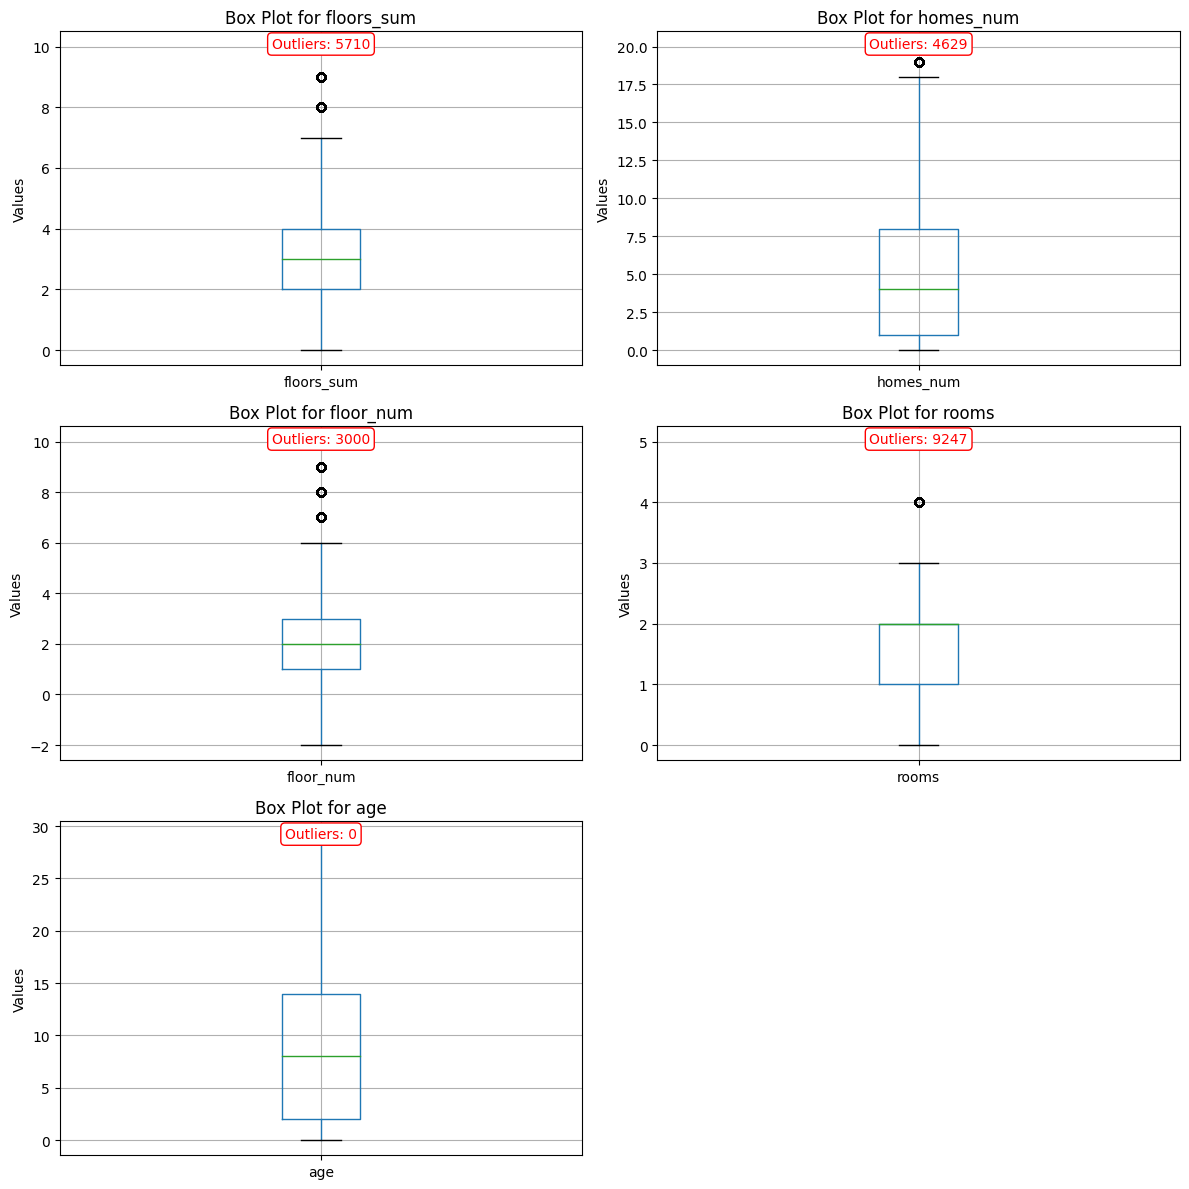

In [11]:
columns_to_plot = ['floors_sum', 'homes_num', 'floor_num', 'rooms', 'age']

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 2)  # Calculate row and column index for 3x2 grid

    # Calculate IQR and outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Plot boxplot
    df[[column]].boxplot(ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot for {column}')
    axes[row, col].set_ylabel('Values')

    # Add outlier count as text annotation
    outlier_count = len(outliers)
    axes[row, col].annotate(
        f'Outliers: {outlier_count}', 
        xy=(0.5, 0.95), 
        xycoords='axes fraction', 
        ha='center', 
        fontsize=10, 
        color='red', 
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white')
    )

# Remove the unused subplot (bottom right in the 3x2 grid if necessary)
if len(columns_to_plot) < 6:
    fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


In [13]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapi")
location = geolocator.geocode("مشهد، خیابان امام رضا")
print(location.latitude, location.longitude)

36.28566401390007 59.61357981646451


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# تعریف تابع برای دریافت مختصات
def get_coordinates(address):
    geolocator = Nominatim(user_agent="geoapi")
    try:
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:  # مدیریت زمان‌بندی در صورت کند بودن پاسخ
        return 'time', 'time'



# ایجاد دو ستون latitude و longitude
df[['latitude', 'longitude']] = df['address'].apply(lambda x: pd.Series(get_coordinates(x)))




In [3]:
df['address'] = 'مشهد،' + df['address']

In [15]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut,GeocoderUnavailable
from tqdm import tqdm
import time

# فعال کردن tqdm برای pandas
tqdm.pandas()


def get_coordinates(address, retries=3):
    geolocator = Nominatim(user_agent="geoapi", timeout=10)
    for attempt in range(retries):
        try:
            location = geolocator.geocode(address)
            if location:
                return location.latitude, location.longitude
            else:
                return 'not found', 'not found'  # اگر آدرس پیدا نشد
        except (GeocoderTimedOut, GeocoderUnavailable):
            time.sleep(2)  # توقف کوتاه قبل از تلاش مجدد
    return 'timeout', 'timeout'  







In [16]:
unique_addresses = pd.DataFrame(df['address'].unique(), columns=['address'])

# ایجاد دو ستون latitude و longitude با نمایش نوار پیشرفت برای آدرس‌های یکتا
unique_addresses[['latitude', 'longitude']] = unique_addresses['address'].progress_apply(lambda x: pd.Series(get_coordinates(x)))

100%|██████████| 27131/27131 [5:27:06<00:00,  1.38it/s]   


In [17]:
unique_addresses.to_csv('../data/latlong.csv',encoding='utf-8-sig',index=False)

In [18]:
tqdm.pandas()

# Assuming 'address' is the column you want to pass to the function
unique_addresses[['latitude', 'longitude']] = unique_addresses.progress_apply(
    lambda row: pd.Series(get_coordinates(row['address'])) if row['latitude'] == 'timeout' else pd.Series([row['latitude'], row['longitude']]),
    axis=1
)

100%|██████████| 27131/27131 [00:07<00:00, 3817.83it/s]


In [19]:
unique_addresses.to_csv('../data/latlong2.csv',encoding='utf-8-sig',index=False)

In [13]:
df['address'].unique()

array(['مشهد،ارمغان 7', 'مشهد،هاشمیه 59', 'مشهد،بین حسابی جنوبی 11 و 13',
       ..., 'مشهد،ابوذر 6', 'مشهد،نبش لادن 18', 'مشهد،کوی امیر 21'],
      dtype=object)

In [20]:
len(df['address'].unique())

27131

In [22]:
unique_addresses['latitude'].value_counts()

latitude
not found             12507
36.3354901               80
36.3298748               75
36.2940987               70
36.3304685               65
                      ...  
36.30778323689333         1
36.358798908147996        1
36.29728072295632         1
36.31927400718083         1
36.30886292112977         1
Name: count, Length: 8073, dtype: int64

In [23]:
da = unique_addresses[unique_addresses['latitude']=='not found']

In [42]:
dh['address_no_digits'] = dh['address'].str.replace(r'\d+|/|\bو\b|\bبین\b|\bنبش\b|\bو\b', '', regex=True).str.strip()
ds['address_no_digits'] = ds['address'].str.replace(r'\d+|/|\bو\b|\bبین\b|\bنبش\b|\bو\b', '', regex=True).str.strip()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9240\3962433377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['address_no_digits'] = ds['address'].str.replace(r'\d+|/|\bو\b|\bبین\b|\bنبش\b|\bو\b', '', regex=True).str.strip()


In [24]:
dh

,address,latitude,longitude,address_no_digits
0,مشهد،ارمغان 7,36.3472622,59.4669914,مشهد،ارمغان
1,مشهد،هاشمیه 59,36.3075391,59.5010743,مشهد،هاشمیه
2,مشهد،بین حسابی جنوبی 11 و 13,36.3496456,59.4956445,مشهد، حسابی جنوبی
3,مشهد،کوثر شمالی 30,36.309637693911846,59.51034766559416,مشهد،کوثر شمالی
4,مشهد،بین حسابی شمالی 35 و 37,36.3620172,59.504458,مشهد، حسابی شمالی
...,...,...,...,...
27126,مشهد،کاظمیه 7و 9,36.38192647097275,59.50495475672827,مشهد،کاظمیه و
27127,مشهد،شریعتی 27و 29,36.30699665,59.53394971683119,مشهد،شریعتی و
27128,مشهد،ابوذر 6,36.30886292112977,59.653081618411406,مشهد،ابوذر
27129,مشهد،نبش لادن 18,36.3137311,59.4691093,مشهد، لادن


In [19]:
dh.to_csv('../data/latlong2.csv',encoding='utf-8-sig',index=False)

In [18]:
dh

,address,latitude,longitude
0,مشهد،ارمغان 7,36.3472622,59.4669914
1,مشهد،هاشمیه 59,36.3075391,59.5010743
2,مشهد،بین حسابی جنوبی 11 و 13,36.3496456,59.4956445
3,مشهد،کوثر شمالی 30,36.309637693911846,59.51034766559416
4,مشهد،بین حسابی شمالی 35 و 37,36.3620172,59.504458
...,...,...,...
27126,مشهد،کاظمیه 7و 9,36.38192647097275,59.50495475672827
27127,مشهد،شریعتی 27و 29,36.30699665,59.53394971683119
27128,مشهد،ابوذر 6,36.30886292112977,59.653081618411406
27129,مشهد،نبش لادن 18,36.3137311,59.4691093


In [20]:
ds = dh[dh['latitude']== 'not found']

In [21]:
ds

,address,latitude,longitude
16,مشهد،شهیدقانع 30,not found,not found
37,مشهد،ین امامت 39 و 41,not found,not found
63,مشهد،بین پیروزی 34 و چهار راه کوثر,not found,not found
64,مشهد،نرسیده به فاطمیه 15,not found,not found
72,مشهد،کوثرجنوبی 12,not found,not found
...,...,...,...
27117,مشهد،گلبهار -مجتمع بقیه الله,not found,not found
27119,مشهد،دور میدان مجیدیه مجتمع استانداری,not found,not found
27120,مشهد،نزدیک تربیت جنوبی 1,not found,not found
27121,مشهد،رهایی - شاملو 11,not found,not found


In [7]:
df = pd.read_csv(r'../data/latlong2.csv')
df.head()

,address,latitude,longitude,address_no_digits
0,مشهد،بین حسابی جنوبی 11 و 13,36.3496456,59.4956445,مشهد، حسابی جنوبی
1,مشهد،بین حسابی شمالی 35 و 37,36.3620172,59.504458,مشهد، حسابی شمالی
2,مشهد،شهیدقانع 30,not found,not found,مشهد،شهیدقانع
3,مشهد،نبش استقلال 3,36.3360108,59.54155085560544,مشهد، استقلال
4,مشهد،بین امامت 62 و 64,36.339668,59.5368507,مشهد، امامت


In [8]:
dh = pd.read_csv(r'../data/latlong.csv')
dh.head()

,address,latitude,longitude
0,مشهد،ارمغان 7,36.3472622,59.4669914
1,مشهد،هاشمیه 59,36.3075391,59.5010743
2,مشهد،بین حسابی جنوبی 11 و 13,not found,not found
3,مشهد،کوثر شمالی 30,36.309637693911846,59.51034766559416
4,مشهد،بین حسابی شمالی 35 و 37,not found,not found


In [9]:
df.shape , dh.shape

((12507, 4), (27131, 3))

In [10]:
dh['latitude'].value_counts()

latitude
not found             12507
36.3354901               80
36.3298748               75
36.2940987               70
36.3304685               65
                      ...  
36.30778323689333         1
36.358798908147996        1
36.29728072295632         1
36.31927400718083         1
36.30886292112977         1
Name: count, Length: 8073, dtype: int64

In [11]:
df['latitude'].value_counts()

latitude
not found             5955
36.33102               108
36.3208563              91
36.2911                 91
36.3325958              85
                      ... 
36.337645961347          1
36.33479395              1
36.354901940737165       1
36.3524259               1
36.38192647097275        1
Name: count, Length: 1046, dtype: int64

In [48]:
dh.replace('not found', pd.NA, inplace=True)

# Merge the two DataFrames on the 'address' column
merged = dh.merge(ds, on='address', suffixes=('_df1', '_df2'), how='left')

# Fill missing latitude and longitude in df1 with values from df2
dh['latitude'] = merged['latitude_df1'].combine_first(merged['latitude_df2'])
dh['longitude'] = merged['longitude_df1'].combine_first(merged['longitude_df2'])



In [49]:
dh['longitude'].value_counts()

longitude
not found             5875
59.5990169             160
59.520002              134
59.5040774             126
59.5094468             123
                      ... 
59.48789695              1
59.48018924236849        1
59.484076645257815       1
59.5919813               1
59.653081618411406       1
Name: count, Length: 8424, dtype: int64

In [50]:
dh

,address,latitude,longitude,address_no_digits
0,مشهد،ارمغان 7,36.3472622,59.4669914,مشهد،ارمغان
1,مشهد،هاشمیه 59,36.3075391,59.5010743,مشهد،هاشمیه
2,مشهد،بین حسابی جنوبی 11 و 13,36.3496456,59.4956445,مشهد، حسابی جنوبی
3,مشهد،کوثر شمالی 30,36.309637693911846,59.51034766559416,مشهد،کوثر شمالی
4,مشهد،بین حسابی شمالی 35 و 37,36.3620172,59.504458,مشهد، حسابی شمالی
...,...,...,...,...
27126,مشهد،کاظمیه 7و 9,36.30699665,59.53394971683119,مشهد،کاظمیه و
27127,مشهد،شریعتی 27و 29,36.30886292112977,59.653081618411406,مشهد،شریعتی و
27128,مشهد،ابوذر 6,36.3137311,59.4691093,مشهد،ابوذر
27129,مشهد،نبش لادن 18,30.824248626146684,50.20286300201437,مشهد، لادن


In [15]:
dh['latitude'].value_counts()

latitude
not found             5955
36.3354901             160
36.33102               134
36.3530934             126
36.3208563             121
                      ... 
36.36416698002301        1
36.366322600000004       1
36.35516380915356        1
36.32991969860252        1
36.30886292112977        1
Name: count, Length: 8431, dtype: int64

In [16]:
dh.shape

(27131, 3)

In [25]:
dh

,address,latitude,longitude,address_no_digits
0,مشهد،ارمغان 7,36.3472622,59.4669914,مشهد،ارمغان
1,مشهد،هاشمیه 59,36.3075391,59.5010743,مشهد،هاشمیه
2,مشهد،بین حسابی جنوبی 11 و 13,36.3496456,59.4956445,مشهد، حسابی جنوبی
3,مشهد،کوثر شمالی 30,36.309637693911846,59.51034766559416,مشهد،کوثر شمالی
4,مشهد،بین حسابی شمالی 35 و 37,36.3620172,59.504458,مشهد، حسابی شمالی
...,...,...,...,...
27126,مشهد،کاظمیه 7و 9,36.38192647097275,59.50495475672827,مشهد،کاظمیه و
27127,مشهد،شریعتی 27و 29,36.30699665,59.53394971683119,مشهد،شریعتی و
27128,مشهد،ابوذر 6,36.30886292112977,59.653081618411406,مشهد،ابوذر
27129,مشهد،نبش لادن 18,36.3137311,59.4691093,مشهد، لادن


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np



# Replace 'not found' with NaN for easier processing
ds.replace('not found', pd.NA, inplace=True)

# Select rows with missing lat/long in df1
missing_rows = ds[ds['latitude'].isna() | ds['longitude'].isna()]

# Vectorize addresses using TF-IDF
vectorizer = TfidfVectorizer().fit(dh['address_no_digits'])
df1_vectors = vectorizer.transform(missing_rows['address_no_digits'])
df2_vectors = vectorizer.transform(dh['address_no_digits'])

# Calculate cosine similarity
similarity_matrix = cosine_similarity(df1_vectors, df2_vectors)

# Find the most similar address in df2 for each missing address in df1
for i, index in enumerate(missing_rows.index):
    # Get the index of the most similar address
    most_similar_idx = np.argmax(similarity_matrix[i])
    # Get the corresponding lat and long from df2
    ds.at[index, 'latitude'] = dh.iloc[most_similar_idx]['latitude']
    ds.at[index, 'longitude'] = dh.iloc[most_similar_idx]['longitude']




C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9240\2971343509.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.replace('not found', pd.NA, inplace=True)


In [67]:
dh.replace('not found', pd.NA, inplace=True)

In [68]:
dh.isna().sum()

address                 0
latitude             5876
longitude            5876
address_no_digits       0
dtype: int64

In [66]:
dh.isna().sum()

address              0
latitude             1
longitude            1
address_no_digits    0
dtype: int64

In [69]:
merged_df = df.merge(dh[['address', 'latitude', 'longitude']], 
                      on='address', 
                      how='left', 
                      suffixes=('', '_from_df2'))

In [70]:
merged_df.shape , df.shape

((393698, 32), (393698, 30))

In [71]:
merged_df.isna().sum()

link                       0
type                       0
date                       0
address                   28
area                   71037
infrastructure         65536
floors_sum              2798
homes_num              14987
floor_num                653
rooms                      0
property_direction     43904
view                       0
flooring               34286
wall                     163
cabinet               120015
cooler                 37217
water                      0
electricity                0
gas                     3251
age                    17228
elevator                   0
parking                    0
desc                   61401
price                 163233
mortgage              218680
rent                  218680
facilities            124972
Dollar                     0
address_no_digits         32
region                    32
latitude               32976
longitude              32976
dtype: int64

In [72]:
merged_df

,link,type,date,address,area,infrastructure,floors_sum,homes_num,floor_num,rooms,...,desc,price,mortgage,rent,facilities,Dollar,address_no_digits,region,latitude,longitude
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,90.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,3.0,2,...,وکالتی,250000000.0,NaN,NaN,"آبگرمکن,بخاری,پارکینگ,تراس,اپن,کمد دیواری,هود,",13391,ارمغان,11.0,36.3472622,59.4669914
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,112.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",3.0,7.0,3.0,2,...,شش دانگ ملک,695000000.0,NaN,NaN,"شوفاژ,پکیج,انباری,پارکینگ,تراس,اپن,آیفون تصویر...",13391,هاشمیه,9.0,36.3075391,59.5010743
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,81.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",6.0,4.0,5.0,2,...,شش دانگ ملک,370000000.0,NaN,NaN,"انباری,پارکینگ,تراس,پنجره دوجداره,نگهبان,آسانس...",13391,حسابی جنوبی,10.0,36.3496456,59.4956445
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,81.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,8.0,3.0,2,...,شش دانگ ملک,450000000.0,NaN,NaN,"آبگرمکن,بخاری,انباری,پارکینگ,تراس,اپن,آیفون تص...",13391,کوثر شمالی,9.0,36.309637693911846,59.51034766559416
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,175.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,2.0,3,...,شش دانگ ملک,962500000.0,NaN,NaN,"شوفاژ,پکیج,اطفاء حریق,انباری,پارکینگ,تراس,پنجر...",13391,حسابی شمالی,10.0,36.3620172,59.504458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393693,https://www.melkeirani.com/home/wZksuVWy/34227...,فروش آپارتمان,1403/08/12,امیریه 37,106.0,106,4.0,8.0,2.0,2,...,وکالتی,2500000000,NaN,NaN,"آبگرمکن,بخاری,انباری,هود,کمد دیواری",69480,امیریه,12.0,36.3880029,59.4868469
393694,https://www.melkeirani.com/home/wZlcqWUA/34234...,فروش آپارتمان,1403/08/12,عدل 8,165.0,165,6.0,6.0,2.0,3,...,آستانه,12350000000,NaN,NaN,"داکت اسپیلت,تراس,انباری,کمد دیواری,هود,گازروکا...",69480,عدل,8.0,36.32477951490358,59.51912611896677
393695,https://www.melkeirani.com/home/wZfMB_Ae/34228...,رهن و اجاره آپارتمان,1403/08/12,رحمانیه 19,103.0,0,5.0,15.0,1.0,2,...,-,400000000,NaN,NaN,NaN,69480,رحمانیه,12.0,36.36849519127429,59.47935841189363
393696,https://www.melkeirani.com/home/wZlkwMbX/34229...,فروش آپارتمان,1403/08/12,کوه سنگی 10,70.0,0,3.0,3.0,3.0,2,...,شش دانگ آستانه,3290000000,NaN,NaN,NaN,69480,کوه سنگی,8.0,36.3134285,59.6024391


In [73]:
merged_df.to_csv('../data/bull.csv',encoding='utf-8-sig',index=False)

In [4]:
ds = df[df['latitude'].isna()]

In [6]:
ds['region'].value_counts()

region
9.0     7607
2.0     5603
3.0     3452
11.0    2820
7.0     2783
10.0    2770
1.0     2604
8.0     2040
12.0    1487
13.0     804
6.0      686
5.0      218
4.0       73
Name: count, dtype: int64

In [9]:
region_means = df.groupby('region').agg({'latitude': 'mean', 'longitude': 'mean'}).reset_index()

In [10]:
region_means

,region,latitude,longitude
0,1.0,36.297572,59.571242
1,2.0,36.319534,59.511215
2,3.0,36.302571,59.548683
3,4.0,36.276186,59.485440
4,5.0,36.329967,59.556959
5,6.0,36.333980,59.484770
6,7.0,36.300887,59.570288
7,8.0,36.296510,59.569504
8,9.0,36.306040,59.497539
9,10.0,36.338261,59.506677
